In [51]:
import numpy as np
from keras.initializers.initializers_v2 import RandomNormal
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import model_from_json
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.initializers import glorot_uniform
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

Giriş katmanı: 32x32x3 boyutlarında bir resim (RGB kanalları varsayılarak).
32 filtre içeren, her biri (3, 3) boyutlarında olan ReLU aktivasyonu kullanan evrişim katmanı.
Maksimum Havuzlama katmanı, boyutları azaltmak için (2, 2) havuzlama boyutu kullanır.
64 filtre içeren, her biri (3, 3) boyutlarında olan ReLU aktivasyonu kullanan bir evrişim katmanı.
Maksimum Havuzlama katmanı, boyutları azaltmak için (2, 2) havuzlama boyutu kullanır.
2D özellik haritalarını 1D vektöre dönüştürmek için Düzleştirme katmanı.
512 birim içeren ve ReLU aktivasyonu kullanan Tam Bağlantılı (Dense) katman.
Aşırı uyumunu önlemek için dropout oranı 0.5 olan Dropout katmanı.
Çoklu sınıf sınıflandırması için 10 birim içeren çıkış katmanı ve softmax aktivasyonu.
Son olarak, model, belirli bir öğrenme oranı, kategorik çapraz entropi kaybı ve doğruluk metriği ile Adam optimizer kullanılarak derlenir.

#Bu işlem, görüntü verilerini normalize etmek içindir.
#Görüntü pikselleri genellikle 0 ile 255 arasında değerlere sahiptir.
#Bu değerlerin 0 ile 1 arasına ölçeklendirilmesi, modelin daha iyi performans göstermesine yardımcı olabilir.

In [52]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#ImageDataGenerator 
datagen = ImageDataGenerator(
    rotation_range=180,             # Rastgele döndürme (0-180 derece arasında)
    width_shift_range=[0, 0.5, 0.99],         # Genişlikte kaydırma
    height_shift_range=[0, 0.5, 0.99],        # Yükseklikte kaydırma
    horizontal_flip=True,          # Yatay simetri oluşturma
    vertical_flip=True,            # Dikey simetri oluşturma
    zoom_range=0.2,                 # Rastgele yakınlaştırma
    shear_range=[0, 0.5, 0.99],               # Kesme etkisi
    channel_shift_range=[0, 0.5, 0.99],       # Rastgele kanal kaydırma
    brightness_range=[0.1, 1.3]    # Rastgele parlaklık aralığı
)

datagen.fit(x_train)

In [53]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

Evrişim Katmanı (Conv2D):

Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)) ifadesi, 32 adet filtre kullanılarak, her biri 3x3 boyutunda olan evrişim filtrelerini uygulayan bir evrişim katmanını tanımlar.
Bu katman, giriş verisi üzerinde evrişim işlemini uygular. activation='relu' ifadesi, ReLU (Rectified Linear Unit) aktivasyon fonksiyonunu kullanmasını belirtir. ReLU, negatif değerleri sıfır yaparak pozitif değerleri geçirir.
input_shape=(32, 32, 3) ifadesi, giriş verisinin boyutunu belirtir. Bu durumda 32x32 piksel boyutunda ve 3 kanallı (RGB renk kanalları) bir giriş beklenmektedir.

MaxPooling Katmanı (MaxPooling2D):

MaxPooling2D(pool_size=(2, 2)) ifadesi, maksimum havuzlama (max pooling) işlemini uygulayan bir maksimum havuzlama katmanını tanımlar.
Maksimum havuzlama, her bir bölgenin içinden en büyük değeri seçerek boyutu küçültür. pool_size=(2, 2) ifadesi, her bir havuzlama bölgesinin boyutunu 2x2 olarak belirtir.


In [54]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same',  kernel_initializer='glorot_uniform', bias_initializer=RandomNormal(stddev=0.01)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu',  kernel_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',  kernel_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu',  kernel_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu',  kernel_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Dense(10, activation='softmax')) # 10 sınıflı bir çıkış katmanı

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_34 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_29 (Conv2D)          (None, 30, 30, 64)        18496     
                                                                 
 batch_normalization_35 (Bat  (None, 30, 30, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                      

In [55]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [56]:
with tf.device('/GPU:0'):
    model_train = model.fit(x_train, y_train, batch_size=32, epochs=35, validation_data=(x_val, y_val))

Epoch 1/35
1250/1250 [==============================] - 9s 7ms/step - loss: 1.5119 - accuracy: 0.4770 - val_loss: 1.2691 - val_accuracy: 0.5546
Epoch 2/35
1250/1250 [==============================] - 8s 6ms/step - loss: 1.0116 - accuracy: 0.6459 - val_loss: 1.1213 - val_accuracy: 0.6196
Epoch 3/35
1250/1250 [==============================] - 8s 6ms/step - loss: 0.8467 - accuracy: 0.7060 - val_loss: 0.8258 - val_accuracy: 0.7163
Epoch 4/35
1250/1250 [==============================] - 8s 6ms/step - loss: 0.7414 - accuracy: 0.7431 - val_loss: 0.7917 - val_accuracy: 0.7251
Epoch 5/35
1250/1250 [==============================] - 8s 6ms/step - loss: 0.6538 - accuracy: 0.7714 - val_loss: 0.7184 - val_accuracy: 0.7550
Epoch 6/35
1250/1250 [==============================] - 8s 6ms/step - loss: 0.5913 - accuracy: 0.7965 - val_loss: 0.8829 - val_accuracy: 0.7204
Epoch 7/35
1250/1250 [==============================] - 8s 6ms/step - loss: 0.5302 - accuracy: 0.8151 - val_loss: 0.7345 - val_accuracy:

In [57]:
model_json = model.to_json()
open('CNN_three_layer_fully_connected.json', 'w').write(model_json)
model.save_weights('CNN_three_fully_connected.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_34 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_29 (Conv2D)          (None, 30, 30, 64)        18496     
                                                                 
 batch_normalization_35 (Bat  (None, 30, 30, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                       

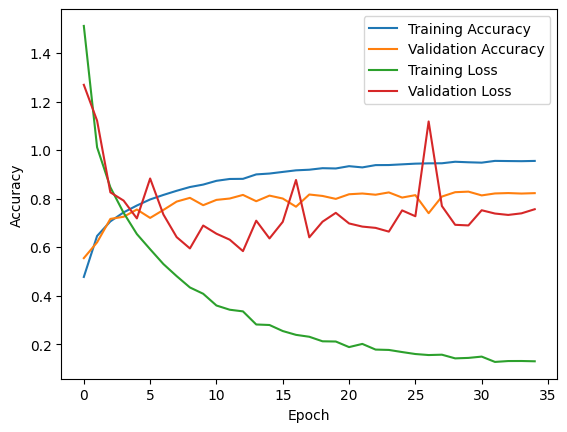

In [58]:
print(model_train.history.keys())


plt.plot(model_train.history['accuracy'], label='Training Accuracy')
plt.plot(model_train.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.plot(model_train.history['loss'], label='Training Loss')
plt.plot(model_train.history['val_loss'], label='Validation Loss')
plt.ylabel('Loss')
plt.ylabel('Accuracy')
print("Model Summary =>", model.summary())
plt.legend()
plt.show()

1/1 [==============================] - 0s 92ms/step


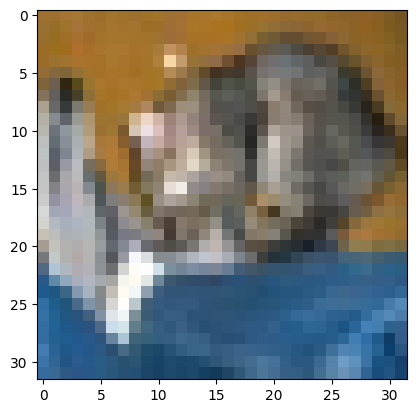

Original label is cat and predicted label is cat
1/1 [==============================] - 0s 68ms/step


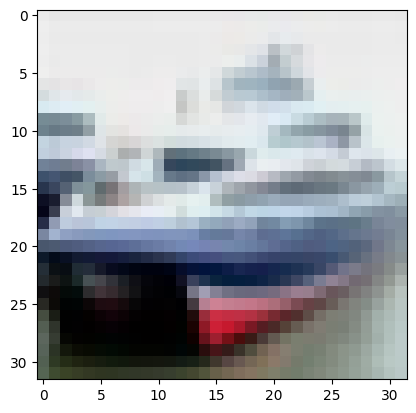

Original label is ship and predicted label is ship
1/1 [==============================] - 0s 66ms/step


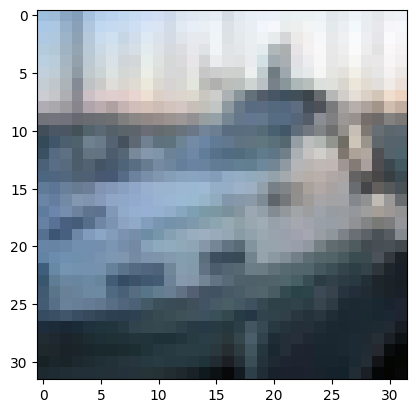

Original label is ship and predicted label is ship
1/1 [==============================] - 0s 67ms/step


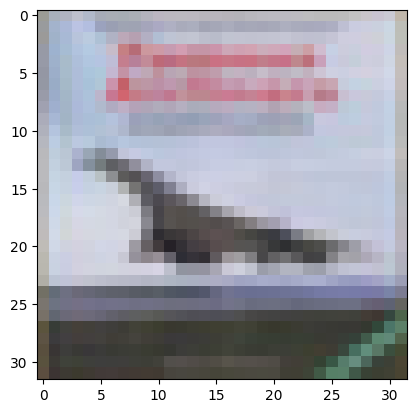

Original label is airplane and predicted label is airplane
1/1 [==============================] - 0s 64ms/step


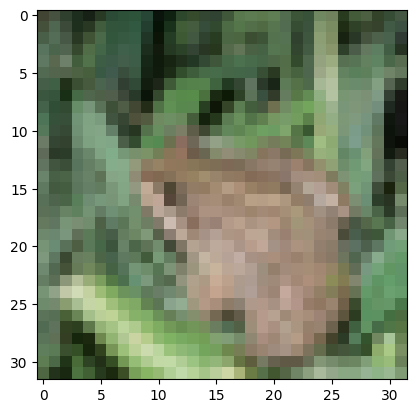

Original label is frog and predicted label is frog
1/1 [==============================] - 0s 65ms/step


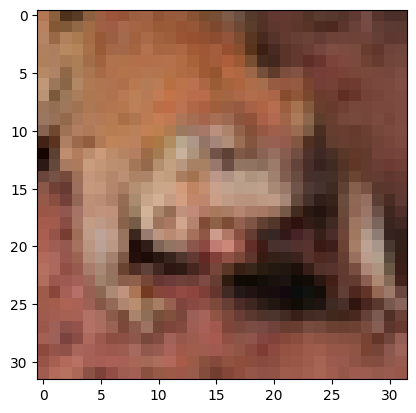

Original label is frog and predicted label is frog
1/1 [==============================] - 0s 63ms/step


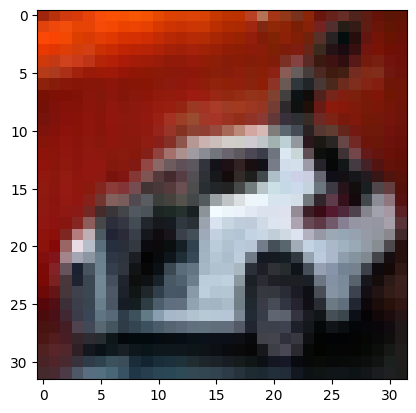

Original label is automobile and predicted label is automobile
1/1 [==============================] - 0s 64ms/step


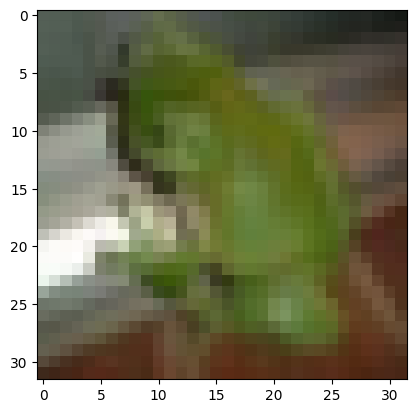

Original label is frog and predicted label is frog
1/1 [==============================] - 0s 68ms/step


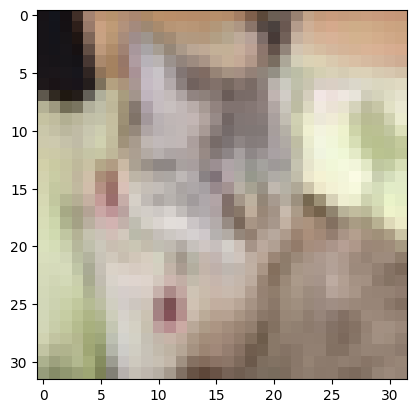

Original label is cat and predicted label is cat
1/1 [==============================] - 0s 95ms/step


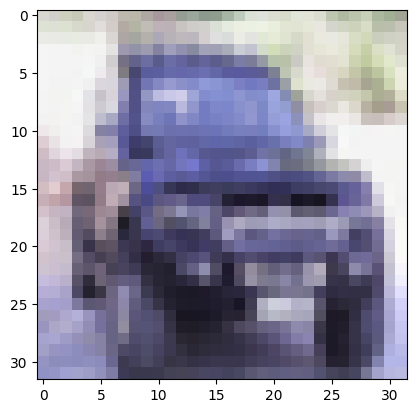

Original label is automobile and predicted label is automobile
1/1 [==============================] - 0s 65ms/step


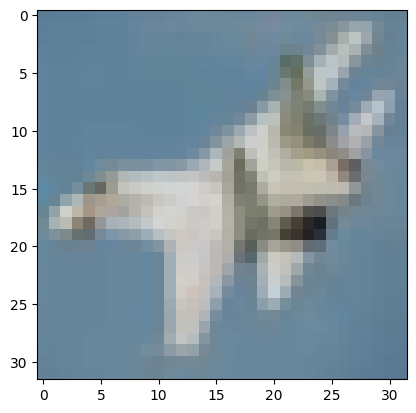

Original label is airplane and predicted label is airplane
1/1 [==============================] - 0s 66ms/step


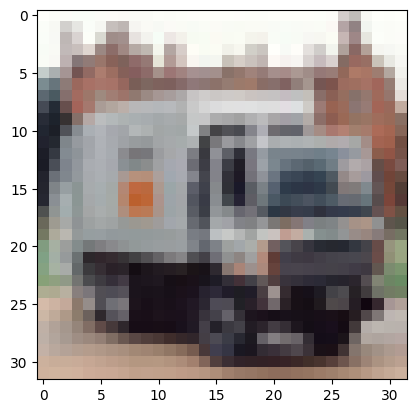

Original label is truck and predicted label is truck
1/1 [==============================] - 0s 64ms/step


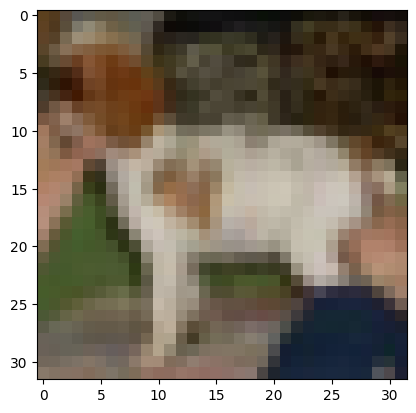

Original label is dog and predicted label is dog
1/1 [==============================] - 0s 67ms/step


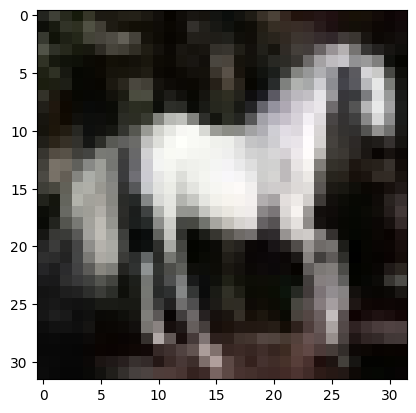

Original label is horse and predicted label is horse
1/1 [==============================] - 0s 70ms/step


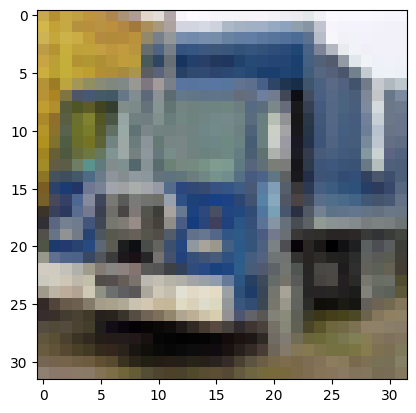

Original label is truck and predicted label is truck
1/1 [==============================] - 0s 68ms/step


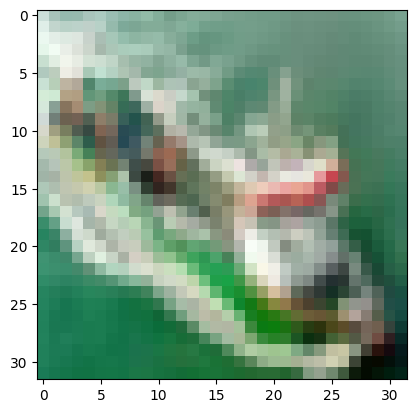

Original label is ship and predicted label is ship
1/1 [==============================] - 0s 66ms/step


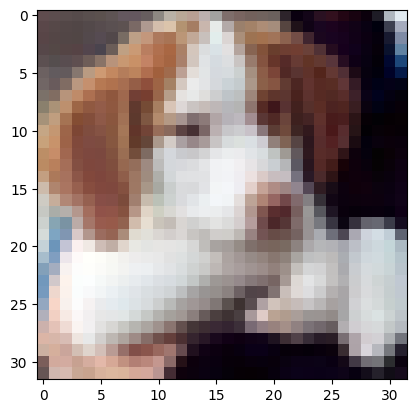

Original label is dog and predicted label is dog
1/1 [==============================] - 0s 67ms/step


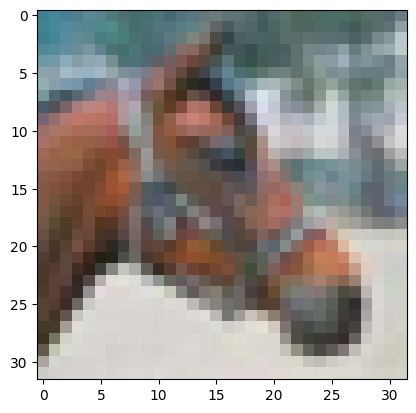

Original label is horse and predicted label is horse
1/1 [==============================] - 0s 67ms/step


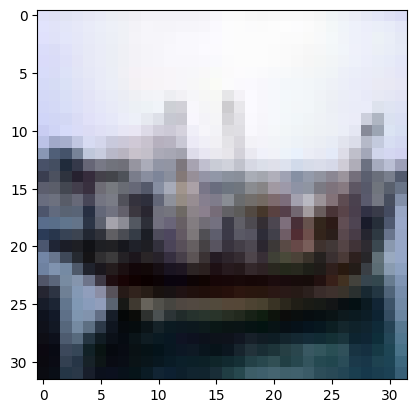

Original label is ship and predicted label is ship
1/1 [==============================] - 0s 66ms/step


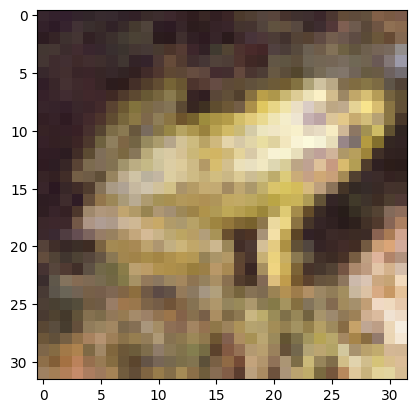

Original label is frog and predicted label is frog


In [61]:
def load_model_and_predict(image_number):
    labels = '''airplane automobile bird cat deer dog frog horse ship truck'''.split()

    json_file = open('CNN_three_layer_fully_connected.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)

    loaded_model.load_weights('CNN_three_fully_connected.h5')

    loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    (_, _), (x_test, y_test) = cifar10.load_data()

    x_test = x_test.astype('float32') / 255
    y_test = to_categorical(y_test, 10)

    image_data = x_test[image_number]

    reshaped_input = np.expand_dims(image_data, axis=0)

    predictions = loaded_model.predict(reshaped_input)

    predicted_class = np.argmax(predictions)

    original_label = labels[np.argmax(y_test[image_number])]

    plt.imshow(image_data)
    plt.show()

    print("Original label is {} and predicted label is {}".format(original_label, labels[predicted_class]))
for i in range(0, 20):
    load_model_and_predict(i)